In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

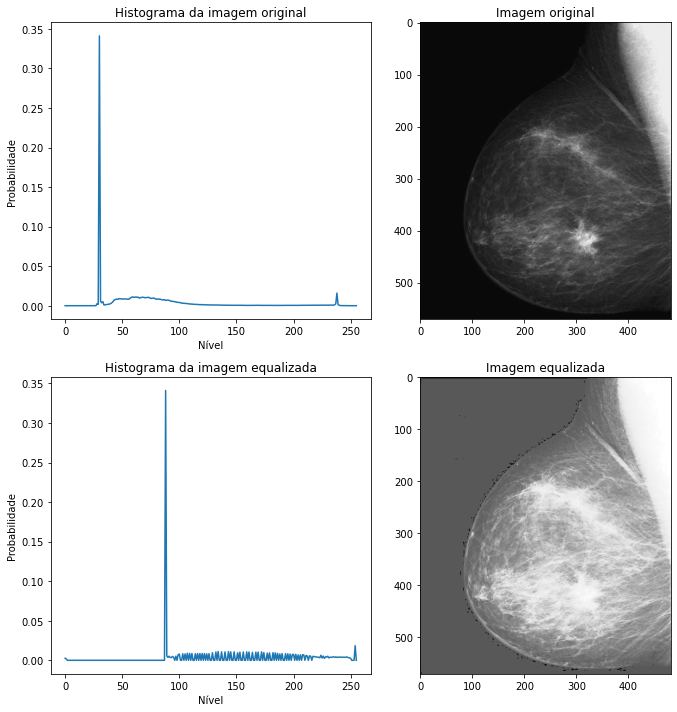

In [2]:
def calculaHistograma(imagem):
    altura, largura = imagem.shape
    histograma = np.zeros(256)
    
    for i in range(0, altura):
        for j in range(0, largura):
            histograma[imagem[i,j]] += 1
    
    return histograma/histograma.sum() # retorna a probabilidade de ocorrência de cada nível
    
def equaliza(probabilidade): 
    niveisNormalizados = np.uint8(probabilidade.cumsum()*255) # np.uint8() - arredonda pra baixo // cumsum() - soma cumulativa
    imagemEqualizada = niveisNormalizados[imagemOriginal]
    
    return imagemEqualizada

imagemOriginal = cv2.imread('Fig0304.tif', cv2.IMREAD_GRAYSCALE)
histogramaOriginal = calculaHistograma(imagemOriginal)

imagemEqualizada = equaliza(histogramaOriginal)
histogramaEqualizada = calculaHistograma(imagemEqualizada)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Histograma da imagem original')
plt.xlabel('Nível')
plt.ylabel('Probabilidade')
plt.plot(histogramaOriginal)

plt.subplot(222)
plt.title('Imagem original')
plt.imshow(imagemOriginal, cmap='gray')

plt.subplot(223)
plt.title('Histograma da imagem equalizada')
plt.xlabel('Nível')
plt.ylabel('Probabilidade')
plt.plot(histogramaEqualizada)

plt.subplot(224)
plt.title('Imagem equalizada')
plt.imshow(imagemEqualizada, cmap='gray')

plt.tight_layout()